https://hackernoon.com/how-to-do-calculus-with-python-derivatives-cheat-sheet-part-1-zfv3uno <br>
https://mathworld.wolfram.com/Integral.html#:~:text=In%20calculus%2C%20an%20integral%20is,integral%20include%20antiderivative%20and%20primitive <br>
http://ecalculo.if.usp.br/integrais/soma_riemann/soma_riemann.htm <br>
https://pt.wikipedia.org/wiki/Integral_de_Riemann <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html <br>
https://en.wikipedia.org/wiki/Antiderivative <br>

## Conceito de Integral

- Em cálculo, o conceito de integral se refere à soma infinitesimal de regiões para se obter o valor total de uma região contínua. Ela pode ser considerada uma área ou a generalização de uma área e, juntamente com a derivada, constitui os conceitos fundamentais do Cálculo.
- O exemplo mais simples de integral é a **Integral de Riemann**. Considerando uma função contínua $f(x)$ num intervalo $[a,b]$ tal que $f(x) \geq 0$  para todo $x \; \epsilon \; [a,b]$, a sua curva plotada no sistema cartesiano fica: <br>

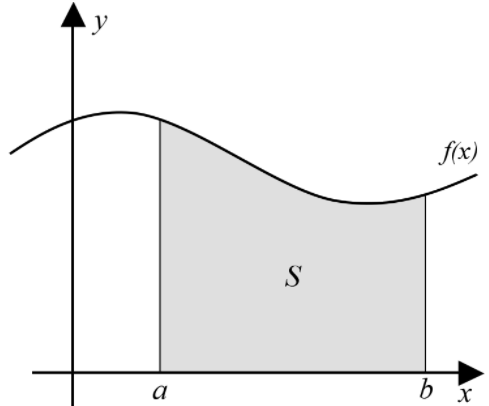

### Integral de Riemann
- O valor total da área sob a curva da função $f(x)$ pode ser obtido dividindo essa área em diversos retângulos menores com extremidades nos pontos $[x_{0}, x_{1}, x_{2}, x_{3}, ..., x_{n}]$. A fórmula para a Integral de Rieman basicamente diz que a área da região compreendida entre o eixo horizontal e o gráfico da função $f(x)$, para x percorrendo o intervalo $[a,b]$, é igual ao limite da soma das áreas dos $n$ retângulos, quando o número desses retângulos tende a infinito.

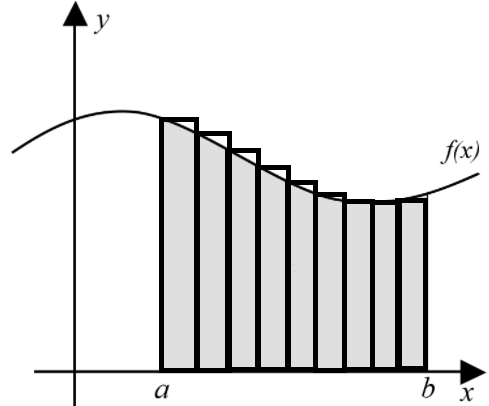

### Fórmula
- A Integral de Riemann da função $f(x)$ em relação a $x$ de $a$ para $b$ é: <br>

$$\large \int_{a}^{b}f(x) \; dx = \lim_{n \rightarrow \infty}\sum_{i=1}^{n} \frac{b-a}{n}f(x_{i-1})$$

- A integral corresponde à "área com sinal", isto é, a área acima do eixo $x$ é positiva e a área abaixo do eixo $x$ é negativa.
- Quando ela possui 2 limites, a integral é do tipo **definida**. Integral sem limite é denominada **indefinida**.

### Função primitiva/integral indefinida/antiderivada
- A **função primitiva/integral indefinida/antiderivada** de uma função $f$ é uma função diferenciável $F$ cuja derivada é igual à função original $f$.
- Isso pode ser representado simbolicamente por $F' = f$.
- O processo de calcular funções primitivas (ou integrais indefinidas) de funções é oposto ao da diferenciação de funções, cujo objetivo é obter a derivada.
- Funções primitivas geralmente são representados por letras maiúsculas.
- Funções primitivas estão relacionadas às integrais definidas pelo **Teorema Fundamental do Cálculo**. <br>

Exemplo: <br>
A função $F(x) = \frac{x^3}{3}$ é a função primitiva de $f(x) = x^2$ uma vez que a derivada de $F(x) = \frac{x^3}{3}$ é $x^2$. Uma vez que a derivada de uma constante é zero, $x^2$ possuirá infinitas funções primitivas da forma $F(x) = \frac{x^3}{3} + C$ onde $C$ é denominada constante de integração.

### Teorema Fundamental do Cálculo
O **Teorema Fundamental do Cálculo** diz que se $f(x)$ é uma função contínua em $[a,b]$, a sua integral definida nesse intervalo é a diferença entre as suas funções primitivas $F(x)$ nas extremidades desse intervalo:

$$\large \int_{b}^{a}f(x)\:dx = F(b) - F(a) = F(x)|^{b}_{a}$$

### Exemplo utilizando scipy
Vamos utilizar a função **quad** da biblioteca Scipy para realizar a integração da função abaixo:

$$\large \int_{0}^{4}x^2dx$$

- Para isso, vamos utilizar a função **lambda** do Python, que permite a criação de funções com número qualquer de argumentos:

In [4]:
x2 = lambda x: x**2
print(x2)
print(type(x2))

<function <lambda> at 0x0000023E7EE14B80>
<class 'function'>


- Após isso, usamos a a função **integrate** da biblioteca **scipy** para realizar a integração.
- O valor retornado é uma tupla, onde o primeiro elemento é o valor estimado da integral e o segundo elemento é o limite superior de erro.

In [5]:
from scipy import integrate
integrate.quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

$$\large \int_{0}^{4}x^2dx \cong 21.333$$

### Exemplo por aproximação superior
Vamos resolver a mesma integral de Riemann por aproximação superior. Para isso, vamos dividir a área S em diversos retângulos de base $[x_{i-1},x_{i}]$ e altura $f(x_{i})$

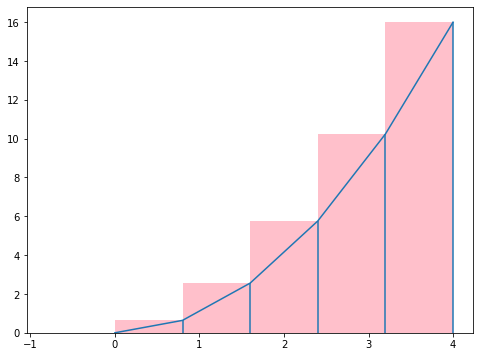

In [38]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize =(8,6))

a = 0
b = 4
n = 5
x = np.linspace(a,b,n+1)

f = lambda x: x**2
vetor = []

for i in x:
  vetor.append(f(i))
  plt.vlines(i,0,f(i))

y = x**2
plt.plot(x,y)
plt.bar(x, vetor, align='edge', width=-(b-a)/n, color='pink')
plt.show()

- A área da região S será tanto mais próxima do valor real $21.333$ quanto mais retângulos utilizarmos para dividir a área:

In [26]:
import numpy as np

def area(a,b,n):
    y = np.linspace(a,b,n+1)
    w = (b - a)/n
    f = lambda x: x**2
    S = 0

    for i in y[1:]:
        S = S + f(i)*w 
        
    print(f"Área: {S:.3f} (para {n} retângulos)")

area(0,4,5)
area(0,4,100)
area(0,4,500)
area(0,4,1000)
area(0,4,5000)
area(0,4,10000)

Área: 28.160 (para 5 retângulos)
Área: 21.654 (para 100 retângulos)
Área: 21.397 (para 500 retângulos)
Área: 21.365 (para 1000 retângulos)
Área: 21.340 (para 5000 retângulos)
Área: 21.337 (para 10000 retângulos)


### Exemplo por aproximação inferior
Vamos resolver a mesma integral de Riemann por aproximação inferior. Para isso, vamos dividir a área S em diversos retângulos de base $[x_{i-1},x_{i}]$ e altura $f(x_{i-1})$

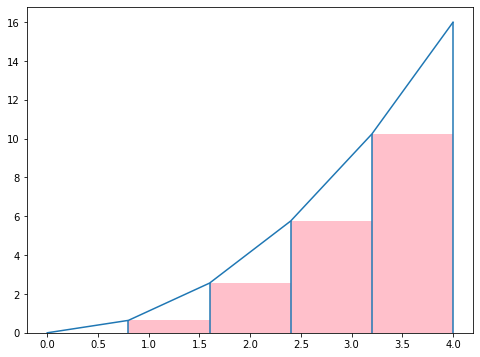

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(8,6))

a = 0
b = 4
n = 5
x = np.linspace(a,b,n+1)

f = lambda x: x**2
vetor = []
for i in x:
  vetor.append(f(i))
  plt.vlines(i,0,f(i))

y = x**2
plt.plot(x,y)
plt.bar(x[:-1], vetor[:-1], align='edge', width=(b-a)/n, color='pink')
plt.show()

- A área da região S será tanto mais próxima do valor real $21.333$ quanto mais retângulos utilizarmos para dividir a área:

In [33]:
import numpy as np

def area(a,b,n):
    y = np.linspace(a,b,n+1)
    w = (b - a)/n
    f = lambda x: x**2
    S = 0

    for i in y[:-1]:
        S = S + f(i)*w 
        
    print(f"Área: {S:.3f} (para {n} retângulos)")

area(0,4,5)
area(0,4,100)
area(0,4,500)
area(0,4,1000)
area(0,4,5000)
area(0,4,10000)

Área: 15.360 (para 5 retângulos)
Área: 21.014 (para 100 retângulos)
Área: 21.269 (para 500 retângulos)
Área: 21.301 (para 1000 retângulos)
Área: 21.327 (para 5000 retângulos)
Área: 21.330 (para 10000 retângulos)


## Aplicações da Integral de Riemann


- Pode ser utilizado na Matemática para: determinar a área de polígonos regulares ou irregulares; calcular a Transformada de Fourier; determinar o comprimento de uma curva; determinar o volume de um sólido.
- Na física, é utilizado para: determinar a massa de um objeto caso a sua densidade seja conhecida; calcular o trabalho realizado partindo da força; calcular a velocidade e o instante dado a aceleração e as condições iniciais; calcular as equações de Maxwell.
- Na engenharia é utilizado para determinar a força cortante e momento fletor; centroide de uma área; momento de inércia de uma área;
- Na estatística é utilizado na função densidade de probabilidade.
- Na química, pode ser utilizado para determinar a força a partir da pressão provocada por um conjunto de moléculas no interior de um recipiente.